##Setting up

Mounting Google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns

Importing dataset

In [8]:
df=pd.read_csv("/content/drive/MyDrive/Crops-Majorproject/Cropsdata.csv")
df.tail()

,Unnamed: 0,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus,Crop
898,898,7,77,11,19,40,55,37,mustedplant
899,899,7,77,12,15,41,59,41,mustedplant
900,900,7,78,10,20,39,56,39,mustedplant
901,901,7,78,15,23,41,57,40,mustedplant
902,902,7,80,10,24,41,59,37,mustedplant


In [9]:
df['Crop'] = df['Crop'].replace(['mustedplant'],'mustardplant')
del df['Unnamed: 0']
df.tail()

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus,Crop
898,7,77,11,19,40,55,37,mustardplant
899,7,77,12,15,41,59,41,mustardplant
900,7,78,10,20,39,56,39,mustardplant
901,7,78,15,23,41,57,40,mustardplant
902,7,80,10,24,41,59,37,mustardplant


In [10]:
df.to_csv("/content/drive/MyDrive/Crops-Majorproject/Finaldata.csv")

##Exploratory data analysis

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methodsIt is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data.

Checking any null values

In [11]:
X=df.iloc[:,0:7]
Y=df.iloc[:,-1]

In [12]:
df.isnull().sum()

Ph             0
Rainfall       0
Humidity       0
Temperature    0
Potassium      0
Nitrogen       0
Phosphorus     0
Crop           0
dtype: int64

Summary of columns ,its count and their datatypes

In [13]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ph           903 non-null    int64 
 1   Rainfall     903 non-null    int64 
 2   Humidity     903 non-null    int64 
 3   Temperature  903 non-null    int64 
 4   Potassium    903 non-null    int64 
 5   Nitrogen     903 non-null    int64 
 6   Phosphorus   903 non-null    int64 
 7   Crop         903 non-null    object
dtypes: int64(7), object(1)
memory usage: 56.6+ KB
None


Summarizing data based on crops count

In [14]:
df['Crop'].value_counts()

paddy           386
wheat           262
mustardplant    124
maize            81
sugarcane        50
Name: Crop, dtype: int64

In [15]:
dff= df.sample(frac = 1)
dff.head(20)

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus,Crop
442,4,146,56,22,29,113,32,paddy
133,5,37,36,40,18,45,21,wheat
530,4,168,59,22,34,109,28,paddy
134,5,37,36,40,23,48,19,wheat
401,4,145,59,22,28,98,35,paddy
417,4,146,50,24,29,105,32,paddy
604,4,170,53,25,28,105,35,paddy
795,4,49,27,34,24,45,25,mustardplant
870,6,65,12,15,37,57,40,mustardplant
107,5,34,33,45,21,49,19,wheat


Statistical details of the data

In [16]:
df.describe()

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus
count,903.00000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,4.68660,98.427464,42.931340,28.772979,30.186047,76.483942,30.087486
std,0.95828,59.380103,13.502063,8.044393,12.160637,29.459385,12.193019
min,3.00000,30.000000,9.000000,15.000000,18.000000,45.000000,18.000000
25%,4.00000,41.000000,35.000000,22.000000,23.000000,50.000000,23.000000
50%,4.00000,71.000000,45.000000,25.000000,27.000000,58.000000,27.000000
75%,5.00000,150.000000,52.000000,34.000000,34.000000,102.000000,34.000000
max,7.00000,289.000000,80.000000,45.000000,80.000000,150.000000,80.000000


Shape of data

In [17]:
df.shape

(903, 8)

Listing all columns

In [18]:
df.columns

Index(['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus', 'Crop'],
      dtype='object')

Visualizing the count of each crop in the data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


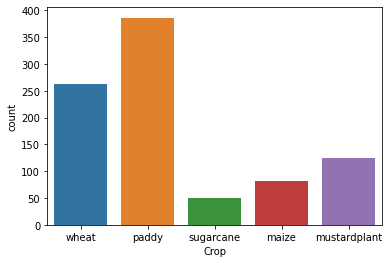

In [19]:
sns.countplot(df['Crop'],label="Count")

Correlation MATRIX:

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

In [20]:
df.corr()

,Ph,Rainfall,Humidity,Temperature,Potassium,Nitrogen,Phosphorus
Ph,1.000000,-0.292755,-0.248949,0.086542,0.413237,-0.155595,0.413573
Rainfall,-0.292755,1.000000,0.708201,-0.689774,0.465976,0.924474,0.471187
Humidity,-0.248949,0.708201,1.000000,-0.287401,0.289897,0.717478,0.286217
Temperature,0.086542,-0.689774,-0.287401,1.000000,-0.360693,-0.622005,-0.377720
Potassium,0.413237,0.465976,0.289897,-0.360693,1.000000,0.685687,0.969108
Nitrogen,-0.155595,0.924474,0.717478,-0.622005,0.685687,1.000000,0.687989
Phosphorus,0.413573,0.471187,0.286217,-0.377720,0.969108,0.687989,1.000000


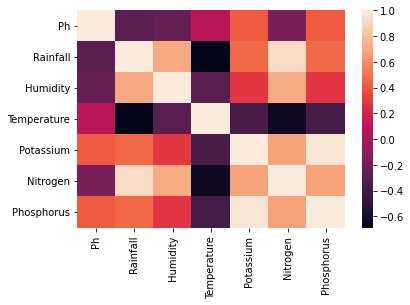

In [21]:
figsize=(8, 6)
sns.heatmap(df.corr())


KDE plot

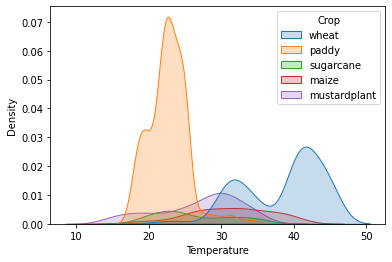

In [22]:
plt.figsize=(10, 8)
sns.kdeplot(data=df, x='Temperature',shade=True,hue='Crop')

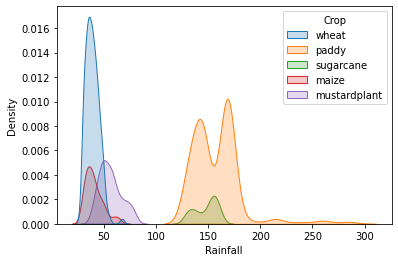

In [23]:

sns.kdeplot(data=df, x='Rainfall',shade=True,hue='Crop')

<Figure size 1152x432 with 0 Axes>

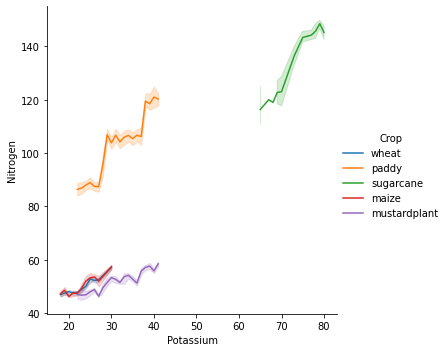

In [24]:
plt.figure(figsize=(16, 6))
sns.relplot(data=df, x='Potassium',y='Nitrogen',kind='line',hue='Crop')

##Predictive analysis

In [25]:
X=df[['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus']]
Y=df['Crop']       

Splitting Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [29]:
df.columns

Index(['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus', 'Crop'],
      dtype='object')

In [30]:
model.predict([[2,54,5,227,5,9,32]])[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'mustardplant'

In [31]:
model.score(X_test,y_test)

0.994475138121547

Decision Tree

In [32]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
X=df[['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus']]
Y=df[['Crop']] 

In [33]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
dt.score(X_test,y_test)

0.9668508287292817

In [35]:
dt.predict([[4,30,37,21,23,49,20]])[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'maize'

In [36]:
df.columns[0:7]

Index(['Ph', 'Rainfall', 'Humidity', 'Temperature', 'Potassium', 'Nitrogen',
       'Phosphorus'],
      dtype='object')

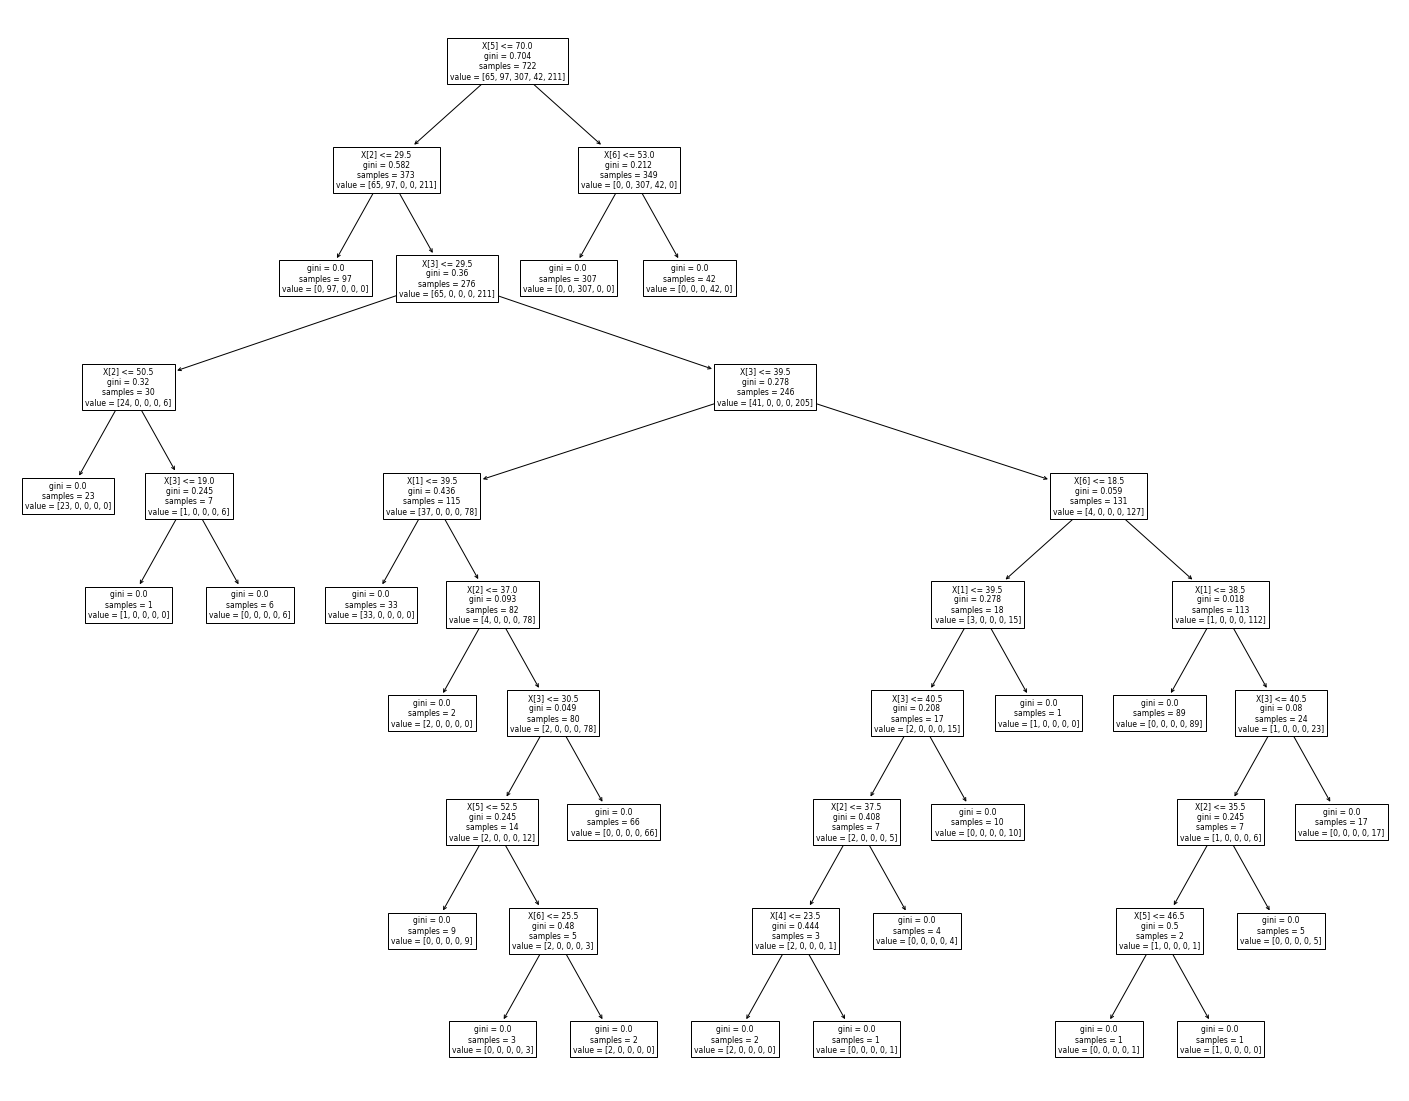

In [37]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree.plot_tree(dt);